In [1]:
from datasets import (
  load_dataset,
)
import matplotlib.pyplot as plt
import os
import numpy as np

/home/infres/abounhar/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATASET_HUB = "atlasia/AL-Atlas-Moroccan-Darija-Pretraining-Dataset"

In [3]:
dataset = load_dataset(DATASET_HUB)

# Distributions

In [4]:
# --------------------------------------------------------------------------------------------------------------- # 
# --------------------------------------------------------------------------------------------------------------- # 

def plot_distribution(dataset, split, column_name='token_count', type='token', max_value=None):
    """Plots and analyzes count distribution for a specified dataset split with optional maximum value.
    
    Args:
        dataset: HuggingFace dataset containing counts
        split: dataset split to analyze ('train' or 'test')
        column_name: name of the column to analyze
        type: type of count (e.g., 'token', 'word')
        max_value: optional maximum value to cut off distribution
        
    Returns:
        tuple: (mean_count, std_count)
    """
    # Extract counts
    counts = np.array(dataset[split][column_name])
    
    # Calculate statistics on full data
    mean_all = np.mean(counts)
    std_all = np.std(counts)
    
    # Apply max_value if specified
    if max_value is not None:
        above_max = np.sum(counts > max_value)
        percent_above = (above_max / len(counts)) * 100
        counts = counts[counts <= max_value]
        
        print(f"\nDistribution details for {split} split:")
        print(f"Samples above {max_value}: {above_max:,} ({percent_above:.2f}%)")
        print(f"Original mean: {mean_all:.2f}")
        print(f"Original std: {std_all:.2f}")
    
    # Calculate statistics on plotted data
    mean_counts = np.mean(counts)
    std_counts = np.std(counts)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot histogram with edge colors
    plt.hist(counts, bins=30, density=False, alpha=0.7, 
             edgecolor='black')
    
    # Add vertical lines for mean and standard deviation
    plt.axvline(mean_counts, color="red", linestyle="--", 
                label=f"μ: {mean_counts:.2f}")
    if (mean_counts - std_counts) > 0:
        plt.axvline(mean_counts - std_counts, color="green", linestyle=":", 
                    label=f"-σ: {std_counts:.2f}")
    plt.axvline(mean_counts + std_counts, color="green", linestyle=":", 
                label=f"+σ: {std_counts:.2f}")
    
    # Customize plot
    title = f"Distribution of {type} Counts - {split.capitalize()} Split"
    if max_value is not None:
        title += f"\n(values ≤ {max_value:,})"
    plt.title(title, fontsize=16)
    plt.xlabel(f"{type} Count", fontsize=11)
    plt.ylabel("Frequency", fontsize=11)
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    # Set y-axis to log scale
    plt.yscale('log')
    
    plt.show()
    
# --------------------------------------------------------------------------------------------------------------- # 
# --------------------------------------------------------------------------------------------------------------- # 

## Tokens

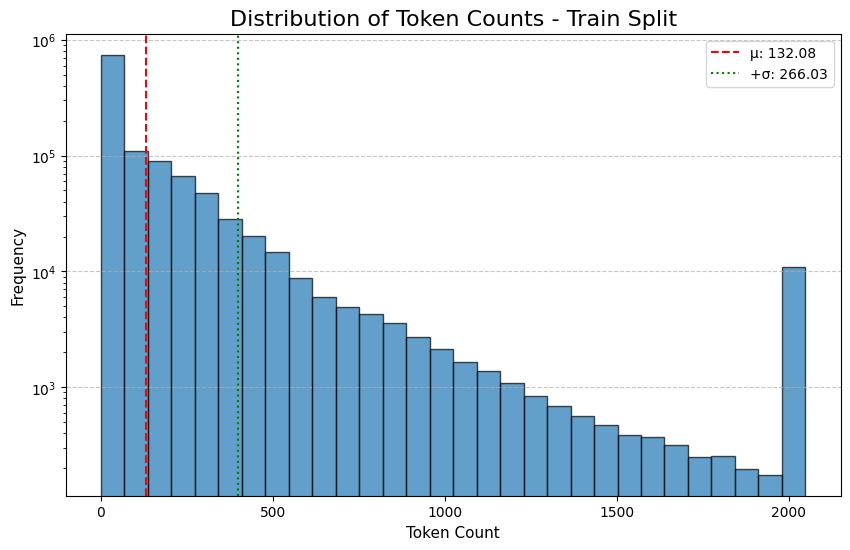

In [5]:
plot_distribution(dataset, 'train', 'token_count', 'Token')

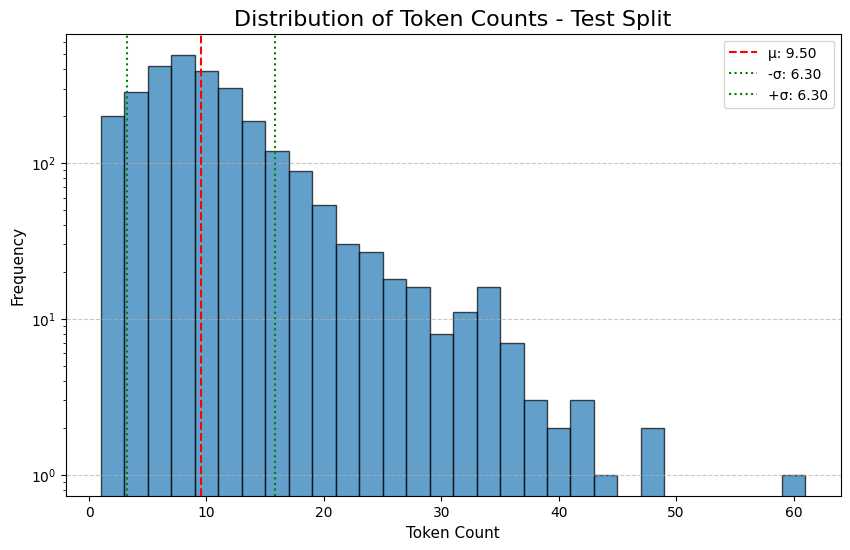

In [6]:
plot_distribution(dataset, 'test', 'token_count', 'Token')

## Words

In [7]:
def get_word_count(texts):
    """Compute word counts for a batch of texts.
    
    Args:
        texts: List of text strings
        
    Returns:
        dict: Dictionary with word counts for each text
    """
    return {
        'word_count': [len(text.split()) for text in texts]
    }

In [8]:
dataset['train'] = dataset['train'].map(
    lambda x: get_word_count(x['text']), 
    batched=True, batch_size=os.cpu_count(),
    desc="Computing word counts for training split..."
)

dataset['test'] = dataset['test'].map(
    lambda x: get_word_count(x['text']), 
    batched=True, batch_size=os.cpu_count(),
    desc="Computing word counts for training split..."
)

In [14]:
# dataset.push_to_hub(DATASET_HUB, commit_message="Added word count.")

Uploading the dataset shards: 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]


CommitInfo(commit_url='https://huggingface.co/datasets/atlasia/AL-Atlas-Moroccan-Darija-Pretraining-Dataset/commit/06fbfac57f7ae91ede62684b784a4ee474d636d6', commit_message='Added word count.', commit_description='', oid='06fbfac57f7ae91ede62684b784a4ee474d636d6', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/atlasia/AL-Atlas-Moroccan-Darija-Pretraining-Dataset', endpoint='https://huggingface.co', repo_type='dataset', repo_id='atlasia/AL-Atlas-Moroccan-Darija-Pretraining-Dataset'), pr_revision=None, pr_num=None)

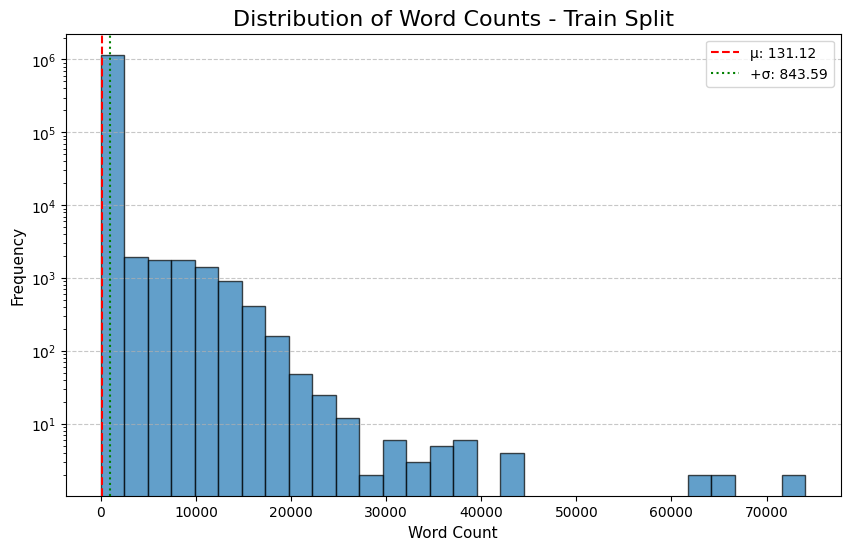

In [11]:
plot_distribution(dataset, 'train', 'word_count', 'Word')

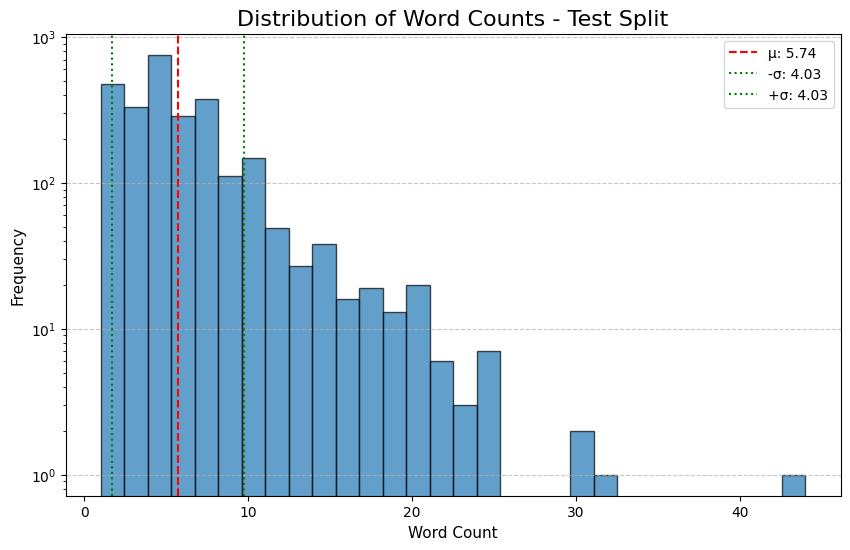

In [12]:
plot_distribution(dataset, 'test', 'word_count', 'Word')